<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο μη επιβλεπόμενης μάθησης <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 παραδείγματα του φυτού <i>Ίρις</i> με βάση το unlabeled dataset που σας δίνεται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε παράδειγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο δείγμα του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε έναν επαρκή αριθμό <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση τον αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>).</li>
</ul>

<font color='#486393'>Οι απαντήσεις στα ερωτήματα γράφονται σε αυτό το χρώμα, προκειμένου να διαφοροποιούνται από την εκφώνηση της άσκησης. Σημειώνεται, επίσης, ότι κάποιες από τις αρχικές εντολές έχουν γίνει commented out, για λόγους εμφάνισης και συντομίας.</font>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

In [2]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()#.data
#print(iris)

In [3]:
#print is optional
#print(iris.data)
iris.feature_names
#print(iris.target)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [5]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

- <font color='#486393'><i>Τα πρώτα δύο ερωτήματα απαντώνται παράλληλα, αφού το ένα εμπεριέχεται στο άλλο.</i><br> Έχοντας μεταφορτώσει τα δεδομένα σε δύο numpy arrays με ονόματα x και y, προχωρούμε στην υλοποίηση της μεθόδου Elbow, ο κώδικας για την οποία φαίνεται ακολούθως.</font>

In [6]:
kmax, Ik = 12, []

for k in range(2, kmax+1):
    model = KMeans(n_clusters=k, random_state=42).fit(x)
    Ik.append(model.inertia_)
    print(f"Using {k} clusters, the model's inertia is equal to {model.inertia_:.3f}.")

Using 2 clusters, the model's inertia is equal to 152.348.
Using 3 clusters, the model's inertia is equal to 78.851.
Using 4 clusters, the model's inertia is equal to 57.228.
Using 5 clusters, the model's inertia is equal to 46.446.
Using 6 clusters, the model's inertia is equal to 39.040.
Using 7 clusters, the model's inertia is equal to 34.469.
Using 8 clusters, the model's inertia is equal to 30.187.
Using 9 clusters, the model's inertia is equal to 28.289.
Using 10 clusters, the model's inertia is equal to 26.552.
Using 11 clusters, the model's inertia is equal to 24.506.
Using 12 clusters, the model's inertia is equal to 23.343.


<font color='#486393'>Σκοπός της μεθόδου Elbow είναι ο προσδιορισμός της υπερπαραμέτρου $k$ του αλγορίθμου $k$-Means. Σε ό,τι αφορά τον αλγόριθμο $k$-Means, η αρχή λειτουργίας του είναι η εξής: αρχικά, $k$ σημεία επιλέγονται τυχαία στο χώρο $\mathbb{R}^d$, όπου $d$ είναι το πλήθος των χαρακτηριστικών που περιγράφουν τα δεδομένα (εδώ $d=4$) - τα λεγόμενα κεντροειδή $x_C$ με $C = 1,2,\dots,k$. Κατόπιν, υπολογίζεται η απόσταση (συνήθως, αλλά όχι απαραίτητα, Ευκλείδεια) κάθε δειγματικού σημείου από όλα τα κεντροειδή, ώστε το δειγματικό σημείο να ανατεθεί στη συστάδα $C$ όπου ανήκει το κεντροειδές από το οποίο απέχει τη μικρότερη απόσταση. Μόλις η ανάθεση αυτή πραγματοποιηθεί για όλα τα δειγματικά σημεία, τα κεντροειδή υπολογίζονται εκ νέου ως ο μέσος όρος κάθε συστάδας:</font>
    
<font color='#486393'>$$x_C = \frac{1}{|C|}\sum_{i\in C}{x_i},$$</font>
    
<font color='#486393'>όπου ο δείκτης $C$ χρησιμοποιείται και για την αρίθμηση των κεντροειδών, αλλά και για να υποδείξει τις συστάδες με τις οποίες αυτά σχετίζονται. Δεδομένων των νέων τιμών για τα κεντροειδή, η διαδικασία επαναλαμβάνεται εκ νέου μέχρις ότου οι τιμές των $x_C$ να πάψουν να ανανεώνονται, δηλαδή μέχρι να επέλθει σύγκλιση σε συγκεκριμένη δομή συστάδων.</font>
    
<font color='#486393'>Η διαδικασία που περιγράφηκε αποτελεί έναν συνεπή αλγόριθμο μη επιβλεπόμενης μάθησης, ο οποίος όμως πάσχει από το γεγονός πως η τιμή του $k$ αποτελεί υπερπαράμετρο του προβλήματος που δεν προβλέπεται από τον αλγόριθμο (σε αντίθεση με αυτό που συμβαίνει σε άλλους αλγορίθμους συσταδοποίησης, όπως o DBSCAN). Στο σημείο αυτό είναι που εμφανίζεται η μέθοδος Elbow, η οποία προσδιορίζει την υπερπαράμετρο $k$ ως εξής: σε πρώτη φάση, ο αλγόριθμος $k$-Means εκτελείται για όλες τις τιμές που ανήκουν στο σύνολο $\{2,3,\dots,k_\text{max}\}$, όπου $k_\text{max}$ είναι το μέγιστο πλήθος συστάδων που θέλουμε να ληφθεί υπ' όψιν. Θεωρητικά, και για λόγους πληρότητας, το $k_\text{max}$ πρέπει να ισούται με το σύνολο των σημείων που καλούμαστε να αναθέσουμε σε συστάδες, αφού έτσι προκύπτει η οριακή περίπτωση όπου κάθε σημείο αποτελεί μία συστάδα. Στην πράξη, όμως, η οριακή αυτή περίπτωση δεν εμφανίζει κανένα ενδιαφέρον, οπότε για το $k_\text{max}$ επιλέγονται μικρότερες τιμές. Σε κάθε περίπτωση συσταδοποίησης, δηλαδή για κάθε τιμή του $k$, και αφότου έχει επέλθει σύγκλιση, υπολογίζεται η αδράνεια κάθε συστάδας σύμφωνα με τη σχέση</font>

<font color='#486393'>$$I\left(C;k\right) = \sum_{i\in C}{\left(x_i - x_C\right)^2}$$</font>
    
<font color='#486393'>και κατόπιν υπολογίζεται η συνολική αδράνεια του μοντέλου ως</font>

<font color='#486393'>$$I\left(k\right) = \sum_{C=1}^{k}{I\left(C;k\right)}$$</font>

<font color='#486393'>Γενικά, είναι επιθυμητό η αδράνεια να είναι ελάχιστη, υποδεικνύοντας έτσι μια ικανοποιητική συσταδοποίηση. Το κόστος όμως είναι η δυνατότητα γενίκευσης του μοντέλου, αφού η ελαχιστοποίηση της αδράνειας επιτυγχάνεται θεωρητικά στην οριακή περίπτωση όπου κάθε σημείο αποτελεί μια συστάδα. Έτσι, η μέθοδος Elbow αναζητά μια χρυσή τομή μεταξύ γενικευσιμότητας του μοντέλου και ελαχιστοποίησης της αδράνειας, αναθέτοντας στο $k$ την τιμή εκείνη για την οποία δημιουργείται ένας «αγκώνας» στη γραφική παράσταση $I\left(k\right)$ vs $k$. Στο ακόλουθο σχήμα απεικονίζεται η γραφική αυτή παράσταση, μαζί με τις τιμές του $k$ που αντιστοιχούν στον εν λόγω αγκώνα.</font>

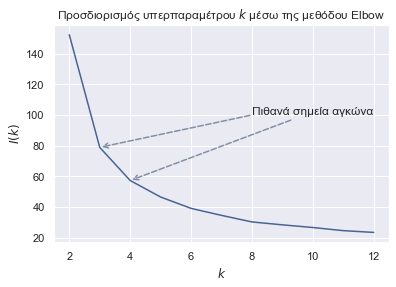

In [7]:
import seaborn as sns
sns.set(style = "darkgrid") # καθαρά αισθητικοί λόγοι

mycol = (72/255, 99/255, 147/255)
mycomplcol = (129/255, 143/255, 163/255)

fig, ax = plt.subplots()

ax.plot(range(2,kmax+1), Ik, color=mycol)
ax.annotate("Πιθανά σημεία αγκώνα", xy=(4, Ik[2]), xytext=(8, 100), arrowprops=dict(color = mycomplcol, arrowstyle="->", lw=1.5,                             ls='--'))
ax.annotate("", xy=(3, Ik[1]), xytext=(8, 100), arrowprops=dict(color = mycomplcol, arrowstyle="->", lw=1.5,                             ls='--'))
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$I(k)$")
ax.set_title(r"Προσδιορισμός υπερπαραμέτρου $k$ μέσω της μεθόδου Elbow")
plt.show()

<font color='#486393'>Όπως απεικονίζεται στα παραπάνω, οι πιθανές τιμές του $k$ είναι οι $k=3$ και $k=4$, με επικρατέστερη την $k=4$, γεγονός το οποίο επαληθεύει και την επιλογή μας να μη διερευνήσουμε εξαντλητικά όλες τις πιθανές τιμές, διαλέγοντας ως $k_\text{max}$ το σύνολο των δεδομένων. Η τιμή $k=2$ οδηγεί σε πολύ υψηλή αδράνεια, ενώ αντίθετα οι τιμές $k>4$ αφενός μειώνουν την αδράνεια, αφετέρου όμως η μείωση αυτή δεν είναι πάρα πολύ σημαντική για να υπερτερεί έναντι της μειωμένης γενικευσιμότητας του τελικού μοντέλου.</font>
    
<font color='#486393'>Σημειώνεται στο σημείο αυτό ως μια ενδιαφέρουσα προσθήκη πως όλα τα παραπάνω, συμπεριλαμβανομένων και των απεικονίσεων, παρέχονται σε μια έτοιμη υλοποίηση της μεθόδου `cluster` της βιβλιοθήκης `yellowbrick`, η οποία περιλαμβάνει και επιπλέον στοιχεία. Παρακάτω φαίνεται ο σχετικός κώδικας:</font>

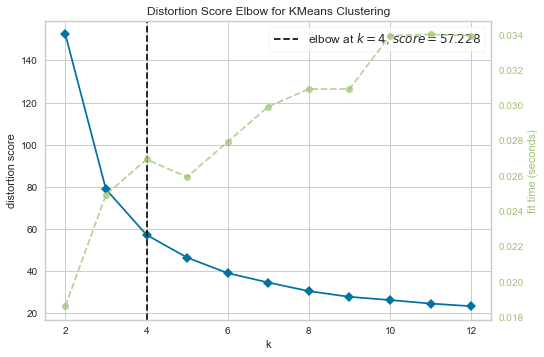

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
KElbowVisualizer(model, k=(2,13)).fit(x).show()
print() # <- to remove KElbow's message

<font color='#486393'>Προφανώς, τα αποτελέσματα ταυτίζονται με αυτά που υπολογίστηκαν και με τη δική μας υλοποίηση. Η παραπάνω υλοποίηση της `yellowbrick` περιλαμβάνει πληροφορία και για το χρόνο εκπαίδευσης κάθε μοντέλου, ενώ επιλέγει μία μόνο τιμή για το $k$, την $k = 4$, σε συμφωνία με τις δικές μας προβλέψεις.</font>

<font color='#486393'>Επιλέγοντας, λοιπόν, την τιμή $k = 4$, το τελικό μοντέλο μαζί με τις σχετικές προβλέψεις του είναι το ακόλουθο:</font>

In [9]:
model = KMeans(n_clusters=4, random_state=42).fit(x)
predictions_4 = model.predict(x)
print(predictions_4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]


- <font color='#486393'>Πέραν της αδράνειας, υπάρχουν πρόσθετες μετρικές για να αξιολογήσουν την απόδοση ενός μοντέλου συσταδοποίησης. Αν και ευρέως χρησιμοποιούνται σε προβλήματα ταξινόμησης, μπορεί κανείς να αξιολογήσει το τελικό μοντέλο βάσει της ακρίβειάς του (accuracy), μιας και τα πραγματικά labels των σημείων είναι διαθέσιμα, ή και μέσω της μήτρας σφαλμάτων (confusion matrix). Σημειώνεται πως δεδομένου του confusion matrix μπορεί να υπολογιστεί και το αντίστοιχο accuracy, χωρίς το αντίστροφο να ισχύει. Έχουμε:</font>

In [10]:
from matplotlib.colors import LinearSegmentedColormap

def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

mycmap = CustomCmap([1.0, 1.0, 1.0], [72/255, 99/255, 147/255])

import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_cm(cfmatrix,classes):
    fig, ax1 = plt.subplots(1,1)

    for ax,cm in zip([ax1],[cfmatrix]):
        im = ax.imshow(cm, interpolation='nearest', cmap=mycmap)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=.2)
        plt.colorbar(im, cax=cax) #, ticks=[-1,-0.5,0,0.5,1]
        ax.set_title('Μήτρα Σφαλμάτων',fontsize=14)
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=0)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)

        fmt = 'd'
        thresh = cm.max() / 2.

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        ax.set_ylabel('Πραγματικό label',fontsize=14)
        ax.set_xlabel('Προβλεπόμενο label',fontsize=14)

    plt.show()

Η ακρίβεια του μοντέλου συσταδοποίησης ισούται με 70.000%.
Η μήτρα σφαλμάτων απεικονίζεται ακολούθως:


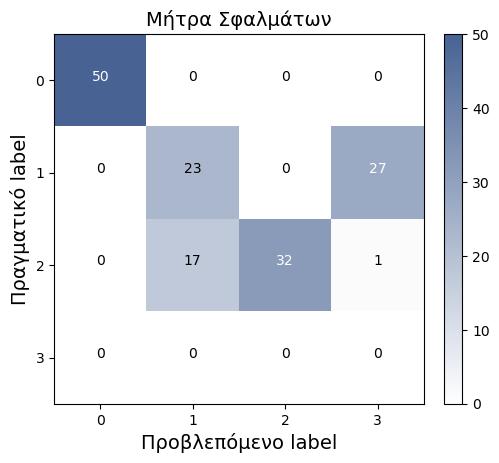

In [11]:
import matplotlib
matplotlib.rc_file_defaults()

acc_4 = sm.accuracy_score(y, predictions_4)
print(f'Η ακρίβεια του μοντέλου συσταδοποίησης ισούται με {100*acc_4:.3f}%.')
print('Η μήτρα σφαλμάτων απεικονίζεται ακολούθως:')

cfmat = sm.confusion_matrix(y, predictions_4)
plot_cm(cfmat,range(4))

<font color='#486393'>Όπως ήταν αναμενόμενο, το τελικό μοντέλο δεν αποδίδει πάρα πολύ ικανοποιητικά βάσει των μετρικών αυτών, αφενός διότι οι μετρικές δεν είναι οι βέλτιστες για να αξιολογήσουν μοντέλα συσταδοποίησης και αφετέρου διότι γνωρίζουμε εκ προοιμίου πως ο αριθμός των διαφορετικών κατηγοριών του συνόλου δεδομένων είναι 3, παρ' όλα αυτά πραγματοποιούμε τη συσταδοποίηση χρησιμοποιώντας 4 συστάδες, αφού αυτό το πλήθος υπέδειξε η μέθοδος Elbow.</font>

<font color='#486393'>Αξίζει, κλείνοντας την ανάλυση αυτή, να παραθέσουμε τα αντίστοιχα αποτελέσματα και για 3 συστάδες, αφού πριν χρησιμοποιηθεί η υλοποίηση της `yellowbrick` η επιλογή $k=3$ είχε φανεί επίσης αρκετά πιθανή.</font>

Η ακρίβεια του μοντέλου συσταδοποίησης ισούται με 89.333%.
Η μήτρα σφαλμάτων απεικονίζεται ακολούθως:


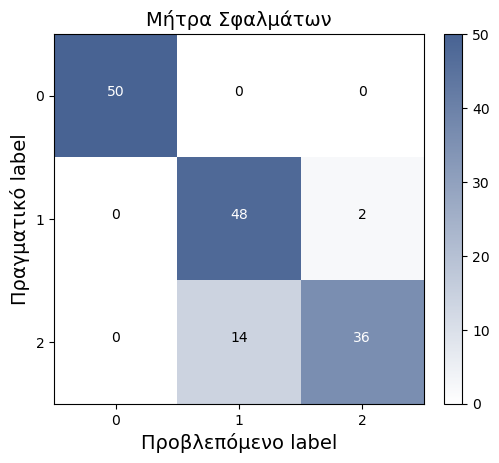

In [12]:
model_3 = KMeans(n_clusters=3, random_state=42).fit(x)
predictions_3 = model_3.predict(x)

# Στο σημείο αυτό είναι απαραίτητο ένα re-labeling, ώστε οι τιμές των ετικετών να ταυτίζονται με αυτές των predictions
fixed_preds = []
for pred in predictions_3:
    if pred==0:
        fixed_preds.append(1)
    elif pred==1:
        fixed_preds.append(0)
    else:
        fixed_preds.append(pred)

acc_3 = sm.accuracy_score(y, fixed_preds)
print(f'Η ακρίβεια του μοντέλου συσταδοποίησης ισούται με {100*acc_3:.3f}%.')
print('Η μήτρα σφαλμάτων απεικονίζεται ακολούθως:')

cfmat = sm.confusion_matrix(y, fixed_preds)
plot_cm(cfmat,range(3))

<font color='#486393'>Όπως ήταν αναμενόμενο, η συνολική ακρίβεια αυξάνεται σημαντικά, αφού πλέον χρησιμοποιείται ως $k$ η πραγματική τιμή διαφορετικών labels του δείγματος.